# Preparación del dataframe

In [1]:
# Librerías
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder


In [2]:
df_ventas = pd.read_csv("df_ventas_3.csv", sep=",")

# Paso previo para crear var_objetivo
df_ventas["num_compras"] = 1

In [3]:
df_ventas

,Unnamed: 0,item_id,num_order,created_at,product_id,qty_ordered,base_cost,price,discount_percent,customer_id,...,hour,week,day,margin_total,price_total,name,marca_value,analytic_category,nombre_corto,num_compras
0,0,000010d95384a6ba3d57dd870e7b337c,65717498f0771a49497d80f11160093c,2017-09-22 15:46:37,5645.0,1.0,7.4441,10.38,7.0,da5b59745c6a4699dee7684eba901bba,...,15,38,Friday,2.9359,10.38,Weleda Hombre Crema Hidratante 30 ml,weleda,cosmética y belleza,Weleda Hombre Crema Hidratante 30,1
1,1,00001a8fb0bd42b1e16ba731e30cc490,09b538e85ce396ecbb70695f91007830,2018-09-12 21:27:08,28743.0,2.0,35.3166,43.08,7.0,531a918355010bacbe506243a5f05c30,...,21,89,Wednesday,15.5268,86.16,Gynea Gestagyn Men 60 Capsulas,gynea,vida íntima,Gynea Gestagyn Men 60 Capsulas,1
2,2,0000302bc9b9a670dfcb14381555ff45,bc150db52b5a565d31b1c70969638ca9,2018-11-19 16:36:10,9999.0,1.0,2.4673,3.29,20.0,e63460a423099250ab43fe0acb370ff5,...,16,99,Monday,0.8227,3.29,Eladiet Fitotablet Castaño de Indias 60 Compri...,eladiet,NaN,Eladiet Fitotablet Castaño De Indias,1
3,3,000039147df4aacf0aa8b3a552e8ecdb,434cf1eaf255b367ce2d3343bb96b1fe,2017-09-06 12:08:44,68986.0,1.0,27.3680,33.88,5.0,14e6f6400d1c114d509844be3687cb19,...,12,36,Wednesday,6.5120,33.88,Endocare Tensage Ampollas 20uds x 2ml,endocare,cosmética y belleza,Endocare Tensage Ampollas 20Uds X,1
4,4,000091029a220c2fdf12700f07f70b1d,f268c24275ad1d887925fca2909e2c2d,2018-09-29 09:45:14,9692.0,1.0,3.1200,3.81,5.0,872bd419dfb24caf4f996a2cd2b8a9b4,...,9,91,Saturday,0.6900,3.81,Lacer Colutorio Fluor+Xilitol Sabor Fresa 500ml,lacer,higiene,Lacer Colutorio Fluor+Xilitol Sabor,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901803,901803,ffffcab8d90531eb181770c6979a25c5,ddebdd2e96c0af88169812543cca4e90,2018-01-30 07:41:48,50723.0,2.0,2.6550,3.44,7.0,448855207b463acb21f855f6e93adfe6,...,7,57,Tuesday,1.5700,6.88,NUK Detergente Para Biberones y Tetinas 500ml,nuk,infantil,Nuk Detergente Para Biberones Y,1
901804,901804,ffffd2318b3b7227a72206ebad6ebcf9,633a904ed0b773aa5b9f75b23da5faa5,2018-11-12 10:45:17,1089.0,1.0,1.3200,1.79,11.0,12cb24bf9ba9b879e11409397f6486c4,...,10,98,Monday,0.4700,1.79,Interapothek Vaselina Pura 60 Gramos,interapothek,higiene,Interapothek Vaselina Pura 60 Gramos,1
901805,901805,ffffdb6626d303a2915f7248e1201ea2,b3c97179df3c20a0b40843d617ed51a4,2018-04-24 07:32:20,6751.0,4.0,12.7800,17.03,5.0,6d269012ca2b80ad9a2b95edbf188492,...,7,69,Tuesday,17.0000,68.12,FotoUltra 100 ISDIN Spot Prevent Fusión Fluid ...,isdin,cosmética y belleza,Fotoultra 100 Isdin Spot Prevent,1
901806,901806,ffffdfbe1fc5a6d3774cdb06ba1a40b6,59c450800ebc728303dc6f36c23fc71a,2018-12-10 23:43:17,7489.0,1.0,12.7680,17.50,7.0,71b46eaa6f118ba5bc8bffde86a91b39,...,23,102,Monday,4.7320,17.50,Iraltone Forte 60 Cápsulas,iraltone,cosmética y belleza,Iraltone Forte 60 Cápsulas,1


In [4]:
# Se elimina la columna derivada del índice
df_ventas.drop('Unnamed: 0', inplace=True, axis=1)

In [5]:
df_ventas.dropna(inplace=True)

In [6]:
df_ventas.to_excel("df_ventas_4_1.xlsx")

In [7]:
#Añadir columnas a la lista que se quiera hacer dummies

columns_to_encoding = ['day', 'analytic_category']

for column in columns_to_encoding:
    dummies = pd.get_dummies(df_ventas[column])
    for dummy in dummies.columns:
        df_ventas[dummy] = dummies[dummy]
    df_ventas.drop(column, axis = 1, inplace=True)
df_ventas.columns

Index(['item_id', 'num_order', 'created_at', 'product_id', 'qty_ordered',
       'base_cost', 'price', 'discount_percent', 'customer_id', 'zipcode',
       'longitud_zip', 'country', 'region', 'city', 'date', 'year', 'hour',
       'week', 'margin_total', 'price_total', 'name', 'marca_value',
       'nombre_corto', 'num_compras', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'cosmética y belleza', 'herbolario',
       'higiene', 'infantil', 'nutrición', 'ortopedia', 'perfumeria',
       'veterinaria', 'vida íntima', 'óptica'],
      dtype='object')

In [8]:
# Diccionario con las funciones de agregación

dic_agg = {
    "price_total" : "sum",
    "qty_ordered": "sum",
    "discount_percent": "mean",
    "customer_id": "first",
    "city": "first",
    "num_compras":"first",
    'country': "first",
    'region': "first",
    'zipcode': "first",
    'hour': "first",
    }

dic_dummies = dict(zip(df_ventas.columns[list(range(24, len(df_ventas.columns)))].to_list(), ["max"] * (len(df_ventas.columns) - 24)))


dic_agg_2 = {
    "price_total" : "mean",
    "qty_ordered": "mean",
    "discount_percent": "mean",
    #"num_order": "size",
    "city": pd.Series.mode,
    'country': pd.Series.mode,
    'region': pd.Series.mode,
    'zipcode': pd.Series.mode,
    "num_compras": "sum",
    'hour': "mean"
    }

In [9]:
dic_agg.update(dic_dummies)
dic_agg_2.update(dic_dummies)

### GroupBy por pedidos

Paso previo requerido para poder hacer una correcta agrupación por cliente

In [10]:
# Groupby por pedidos


df_pedidos = df_ventas.groupby("num_order", as_index = False).agg(dic_agg)

### Agrupación por clientes

Obteniendo el dataframe final deseado

In [11]:
# Agrupación clientes
df_clientes = df_pedidos.groupby("customer_id").agg(dic_agg_2)

In [12]:
df_clientes

,price_total,qty_ordered,discount_percent,city,country,region,zipcode,num_compras,hour,Friday,...,cosmética y belleza,herbolario,higiene,infantil,nutrición,ortopedia,perfumeria,veterinaria,vida íntima,óptica
customer_id,,,,,,,,,,,,,,,,,,,,,
0001c82eb924a3dca30593bf7d8f2227,33.570000,1.000000,5.000000,Leres De Jaca,Spain,Aragon,22714,1,19.000000,0,...,1,0,0,0,0,0,0,0,0,0
0003883910709aa39bf38b05c51c03a3,82.560000,6.000000,7.000000,Madrid,Spain,Madrid,28050,2,22.500000,0,...,0,0,1,0,0,0,0,0,0,0
0003a36a46798bafcc69637f52f75e95,79.550000,3.000000,5.000000,Barcelona,Spain,Cataluna,08020,1,21.000000,0,...,1,0,0,0,0,0,0,0,0,0
0004a12374b272a1c591fd5122cde6a1,31.794000,3.200000,7.000000,Aviles,Spain,Asturias,33403,5,15.600000,1,...,1,1,1,1,0,0,0,0,1,1
00056bd193d90d603e73ce086364a165,30.473750,2.750000,11.125000,Malaga,Spain,Andalucia,29001,8,11.250000,0,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc9e0a62f07e67ff85803a8b5f30cf,40.124286,3.714286,10.857143,Deba,Spain,Pais Vasco,20820,7,13.285714,1,...,1,0,1,0,1,0,0,0,0,0
fffe0497986df50816e428af728f8900,69.775000,6.500000,5.000000,Cornella De Llobregat,Spain,Cataluna,08940,2,22.500000,0,...,0,1,1,1,1,0,0,0,1,0
fffed4187f3b5f17cb58536f7fac8dee,12.720000,2.000000,8.000000,Llanes,Spain,Asturias,33500,1,8.000000,0,...,0,1,0,0,0,0,0,0,0,0


### Obtención de variable objetivo y modelo a predecir

In [13]:
# Var_obj

df_clientes["num_compras"].replace(1, 0, inplace=True)
mascara_var_obj = df_clientes["num_compras"] > 1
df_clientes["num_compras"][mascara_var_obj] = 1

C:\Users\Daniel\AppData\Local\Temp\ipykernel_13016\4007882791.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clientes["num_compras"][mascara_var_obj] = 1


In [14]:
#Convertir categóricas restantes

list_col_cat = ["city", "country", "region", "zipcode"]

numeric_model = LabelEncoder()
for column in list_col_cat:
    list_values = list(df_clientes[column].unique())
    numeric_model.fit_transform(list_values)
    df_clientes[column] = numeric_model.transform(df_clientes[column])

Como uno de los objetivos es que porcentaje de probabilidad de repetir tienen los clientes, se utilizará el propio dataframe como si fuese un dataframe a predecir.

In [15]:
#df de predicción
df_clientes_no_target = df_clientes.drop("num_compras", axis = 1)

target = df_clientes["num_compras"]

# Modelo

In [16]:
# Librerias para el modelo

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


### Training-Test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_clientes_no_target, target, test_size = 0.2, random_state = 42, stratify = target)

In [19]:
X_test.columns

Index(['price_total', 'qty_ordered', 'discount_percent', 'city', 'country',
       'region', 'zipcode', 'hour', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'cosmética y belleza', 'herbolario',
       'higiene', 'infantil', 'nutrición', 'ortopedia', 'perfumeria',
       'veterinaria', 'vida íntima', 'óptica'],
      dtype='object')

### XGBootst

In [20]:
## Función para métricas

def saca_metricas(y1, y2):
    print('matriz de confusión')
    # print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2))
    print('recall')
    print(recall_score(y1, y2))
    print('f1')
    print(f1_score(y1, y2))
    false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)

In [21]:
xgboost = XGBClassifier()

modelXGB = xgboost.fit(X_train, y_train,  eval_metric='rmse')

y_pred_XGB = modelXGB.predict(X_test)

print(classification_report(y_test, y_pred_XGB))



C:\Users\Daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.93      1.00      0.96     12256
           1       1.00      0.91      0.95     10449

    accuracy                           0.96     22705
   macro avg       0.97      0.96      0.96     22705
weighted avg       0.96      0.96      0.96     22705



matriz de confusión
accuracy
0.960096894957058
precision
0.9983289817232376
recall
0.9148243851086229
f1
0.9547542948461846
AUC
0.9567594510399512


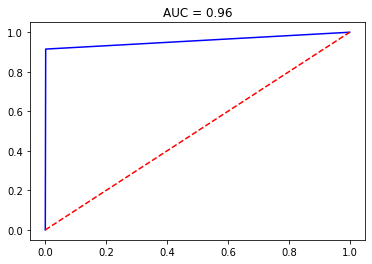

In [22]:
saca_metricas(y_test, y_pred_XGB)

### Variables con más influencia

In [23]:
# Variables

best_xgb_features = modelXGB.feature_importances_

best_xgb_features = pd.DataFrame(best_xgb_features,
                           index = X_train.columns,
                           columns=['importance']).sort_values('importance', ascending=False)

In [24]:
best_xgb_features

,importance
Wednesday,0.124392
higiene,0.114848
Monday,0.114593
Saturday,0.108015
Thursday,0.083138
Tuesday,0.083065
Friday,0.081450
Sunday,0.069763
cosmética y belleza,0.048123
discount_percent,0.037413


In [25]:
mascara = best_xgb_features["importance"] > 0.01
best_features = best_xgb_features[mascara]
num_otras = 1 - best_features["importance"].sum()
nueva_fila = {"importance": num_otras}
best_features_otras = best_features
best_features_otras = best_features_otras.sort_values('importance', ascending=False)
best_features_otras = best_features_otras.append(nueva_fila, ignore_index=True)
best_index = best_features.index.tolist()
best_index.append("otras")
best_features_otras.index = best_index


In [26]:
best_features_otras * 100
best_features * 100

,importance
Wednesday,12.439201
higiene,11.484821
Monday,11.459270
Saturday,10.801467
Thursday,8.313829
Tuesday,8.306529
Friday,8.145039
Sunday,6.976273
cosmética y belleza,4.812329
discount_percent,3.741344


### Probabilidad de volver a comprar

In [27]:
clients_predict = modelXGB.predict_proba(df_clientes_no_target)
list_predict = []
for value in clients_predict:
    list_predict.append(value[1])

In [28]:
df_clientes_no_target["predict"] = list_predict
df_clientes_no_target["predict"] = df_clientes_no_target["predict"] * 100

df_pctge = pd.DataFrame(df_clientes_no_target["predict"])

df_pctge = df_pctge.sort_values('predict', ascending=False)

df_pctge

,predict
customer_id,
24f377535c968e66c622a68763537763,100.000000
916024297cb288a61bbb9d285371b369,100.000000
14d6e170f25007e16aaa165f09d11aab,100.000000
6a98a2c94d08c807c209a01a64a44421,100.000000
df40597cfe7ab40f688723112c5bcb5b,100.000000
...,...
bfd62ea1f1aa5a0496293adab59c6850,0.783331
abb00376613abb9e6e96d015c2e5343e,0.697714
255b49d9fc361eeb2c1c25b19051db9a,0.688638


In [29]:
# Intervalos 


list_var = ["0-20", "20-40", "40-60", "60-80", "80-100"]


df_pctge["predict_interval"] = df_pctge["predict"]


df_pctge["predict_interval"][df_pctge["predict"] <= 100] = "80-100"
df_pctge["predict_interval"][df_pctge["predict"] < 80] = "60-80"
df_pctge["predict_interval"][df_pctge["predict"] < 60] = "40-60"
df_pctge["predict_interval"][df_pctge["predict"] < 40] = "20-40"
df_pctge["predict_interval"][df_pctge["predict"] < 20] = "0-20"



C:\Users\Daniel\AppData\Local\Temp\ipykernel_13016\1303461661.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pctge["predict_interval"][df_pctge["predict"] < 80] = "60-80"
C:\Users\Daniel\AppData\Local\Temp\ipykernel_13016\1303461661.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pctge["predict_interval"][df_pctge["predict"] < 60] = "40-60"
C:\Users\Daniel\AppData\Local\Temp\ipykernel_13016\1303461661.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [30]:
# Porcentaje de clientes
df_pctge.to_excel("pctge_repetir.xlsx")

# Porcentaje de importancia variables
best_features.to_excel("beast_features.xlsx")

# Porcentaje de importancia variables agrupadas en otras las que menos importancia tienen
best_features_otras.to_excel("beast_features_otras.xlsx")